In [51]:
import pandas as pd
import pickle
from ast import literal_eval
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score , confusion_matrix
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC, NuSVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

from germeval import *

In [3]:
vectorizer =  pickle.load(open("vectorizer_without_num.pickle",'rb'))
# Text with the numbers removed
X_train = pickle.load(open("X_train_without_num.pickle", "rb"))
X_test = pickle.load(open("X_test_without_num.pickle", "rb"))
y_train = pickle.load( open("y_train_without_num.pickle", "rb"))
y_test = pickle.load(open("y_test_without_num.pickle", "rb"))
le_mapping = pickle.load(open("le_mapping.pickle", "rb")) # LabelEncoder Mapping

In [4]:
def build_model(clf, X_train,y_train):
    clf.fit(X_train, y_train)
    return clf

## Linear SVC

In [4]:
X_train.shape

(16929, 638284)

In [5]:
X_test.shape

(4233, 638284)

In [6]:
%%time
X_full = np.concatenate((X_train.toarray(),X_test.toarray()))
Y_full = np.concatenate((y_train,y_test))

CPU times: user 27.6 s, sys: 1min 24s, total: 1min 51s
Wall time: 2min 12s


In [7]:
del X_test
del X_train
del y_train
del y_test
import gc
gc.collect()

98

In [8]:
%%time
# data = X_train.toarray(), X_test.toarray(), y_train, y_test
lsvcclf = LinearSVC(random_state=42,verbose=1)
clf = build_model(lsvcclf,X_full,Y_full)

[LibLinear]CPU times: user 2min 15s, sys: 38.2 s, total: 2min 53s
Wall time: 2min 54s


In [111]:
# Load from the pickled model
with open('svm_tfidf_clf.pickle', 'rb') as handle:
    clf = pickle.load(handle)

In [112]:
validation_data = pd.read_csv("../../data/validation_data.csv")

In [113]:
def combine_title_desc(row):
    """Combines the Title and Description fields in the given row
    and returns the combined result"""
    return str(row["title"]) + " " + str(row["description"])
    #return str(row["title"]) + " " + str(row["description"]) + " " + str(row["author"])

In [114]:
validation_tf_idf = vectorizer.transform(validation_data.apply(lambda row: combine_title_desc(row),axis=1))

In [115]:
validation_tf_idf.shape

(2079, 638284)

In [116]:
predictions = clf._predict_proba_lr(validation_tf_idf)

In [117]:
clf.classes_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [118]:
del X_full
del Y_full

NameError: name 'X_full' is not defined

In [16]:
import gc
gc.collect()

1696

In [13]:
class_counts = pd.read_csv("class_count_predictions_from_svc.csv",header=None)

In [14]:
def getClasses(class_probs,class_count):
    arr = np.array(class_probs)
#     print("===")
#     print(class_probs)
#     print(class_count)
#     print(arr.argsort()[-1 * class_count:][::-1])
    return arr.argsort()[-1 * class_count:][::-1]

## Fixing missing category maps

In [66]:
book_df = load_data()
book_df = repeat_categories(book_df)

map_id = max(le_mapping.values())
for sample in book_df["categories"]:
    for category in sample:
        if category not in le_mapping:
            map_id += 1
            le_mapping[category] = map_id
            
book_df["cat_map"] = book_df["category"].apply(lambda x: le_mapping[x])

## Multinominal Naive Bayes

In [47]:
list(val_data_authors.values) + list(book_df['author'].values)

[['Hans-Martin Lübking'],
 ['Cate Tiernan'],
 ['Titus Müller'],
 ['Dalai Lama'],
 ['John Hart'],
 ['Marc Levy'],
 ['Paolo Bacigalupi'],
 ['Anne Østby'],
 ['Karin Slaughter'],
 ['Tom Segev'],
 ['Jeffery Deaver'],
 ['Clemens Berger'],
 ['Jesper Juul'],
 ['T.C. Boyle'],
 ['Selahattin Demirtaş'],
 ['Hannelore Hoger'],
 ['Susan Pinker'],
 ['Zoé Armbruster'],
 ['Stephen Leather'],
 ['Tim Jürgens',
  'Philipp Köster',
  '11 Freunde Verlags GmbH & Co. KG Tim Jürgens'],
 ['Michael Köhlmeier'],
 ['Susan Forward', 'Donna Frazier Glynn'],
 ['Monica Murphy'],
 ['Loretta Napoleoni'],
 ['David Brooks'],
 ['James P. Hogan'],
 ['Helene Tursten'],
 ['John Burnside'],
 ['Katrina Leno'],
 ['David Drake'],
 ['Franz Schuier'],
 ['David F. Ross'],
 ['Jeri Taylor'],
 ['Yvonne C. Heiler'],
 ['Paolo Bacigalupi'],
 ['Laura Griffin'],
 ['Uwe Christiansen'],
 ['Arthur Miller'],
 ['Cecilie Enger'],
 ['Peter Wawerzinek'],
 ['Christoph Borchelt'],
 ['Marcel Reich-Ranicki'],
 ['Bahar Yilmaz'],
 ['Dorothee Meyer-Kahrwe

In [79]:
book_df["author"] = book_df["author"].apply(lambda x: [y.strip() for y in str(x).split(',')])
val_data_authors = validation_data["author"].apply(lambda x: [y.strip() for y in str(x).split(',')])

mlb = MultiLabelBinarizer()
mlb.fit(list(val_data_authors.values) + list(book_df['author'].values))
X = mlb.transform(book_df["author"])
y = book_df['cat_map']
# y2 = book_df['top_level']

clf = MultinomialNB()
clf.fit(X, y)

X.shape, y.shape

((21169, 10283), (21169,))

In [81]:
X_test = mlb.transform(val_data_authors)
pred_prob = clf.predict_proba(X_test)

## Ensemble

In [120]:
predictions.shape

(2079, 330)

There are seven more classes missed out on the SVM predictions. The average value for each prediction on the remaining 330 probabilities will be added for the remaining 7 columns.

In [121]:
seven_dummy = np.repeat(predictions.mean(axis=1).reshape(-1,1), 7, axis=1)
preds = np.hstack((predictions, seven_dummy))

In [122]:
#ENSEMBLING STEP
predictions = preds * pred_prob

In [123]:
le_mapping_inv = {v: k for k, v in le_mapping.items()}

def reverseMap(number):
    return le_mapping_inv[number]

In [124]:
y_prob_list = [i.tolist() for i in predictions]
validation_data["class_probs"] = y_prob_list
validation_data["class_count"] = class_counts.values

In [125]:
# validation_data["predictions"]  = 
validation_data["class_predictions_e"] = validation_data.apply(lambda x:getClasses(x["class_probs"],x["class_count"]),axis=1)

In [126]:
validation_data["class_predictions"] = validation_data["class_predictions_e"].apply(lambda x: [reverseMap(i) for i in x])

In [127]:
def formatOutput(isbn,class_predictions):
    classes = ["\t"+str(i) for i in class_predictions]
    return str(isbn) + "".join(classes) + "\n"

In [128]:
validation_data["class_predictions_top_level"] = validation_data["class_predictions"].apply(lambda cat_paths: [x.split(" > ")[0] for x in cat_paths])

In [129]:
validation_data.head(2)

,title,description,author,published_date,isbn,class_probs,class_count,class_predictions_e,class_predictions,class_predictions_top_level
0,Selbstständig werden im Glauben,Die Konfirmandenzeit wird für Jugendliche beso...,Hans-Martin Lübking,2013-07-22,9783579074030,"[1.6924214503943732e-06, 5.923485481108555e-07...",1,[171],[Literatur & Unterhaltung > Romane & Erzählungen],[Literatur & Unterhaltung]
1,Das Buch der Schatten - Schwarze Seelen,Als Morgan von einer prophetischen Vision heim...,Cate Tiernan,2013-06-10,9783570380093,"[1.6413662804066912e-06, 5.925976887299815e-07...",1,[171],[Literatur & Unterhaltung > Romane & Erzählungen],[Literatur & Unterhaltung]


In [130]:
submissions = validation_data.apply(lambda x:formatOutput(x["isbn"],x["class_predictions_top_level"]),axis=1).values

In [131]:
# y

In [132]:
submissions = np.insert(submissions,0,"subtask_a\n")

In [133]:
submission_format = "".join(submissions)

In [134]:
submission_file = open("../../data/answers_svm_multinomialNB_ensemble.txt",'w')

In [135]:
submission_file.writelines(submission_format)

## Lets check the confusion matrix (Do not run this , this will take long time and will not yield good results)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_pred,y_test,labels=list(le_mapping.values()))
df_cm = pd.DataFrame(array, index = list(le_mapping.keys()),
                  columns = list(le_mapping.keys()))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [6]:
inv_map = {v: k for k, v in le_mapping.items()}

In [7]:
y_pred_top = [inv_map[i].split(" > ")[0] for i in y_pred]

In [8]:
y_test_top = [inv_map[i].split(" > ")[0] for i in y_test]

In [10]:
confarray = confusion_matrix(y_test_top, y_pred_top,labels=list(set(y_test_top)))
confarray.shape

(8, 8)

In [12]:
conf = pd.DataFrame(confarray,columns=list(set(y_test_top)))
conf.index = list(set(y_test_top))

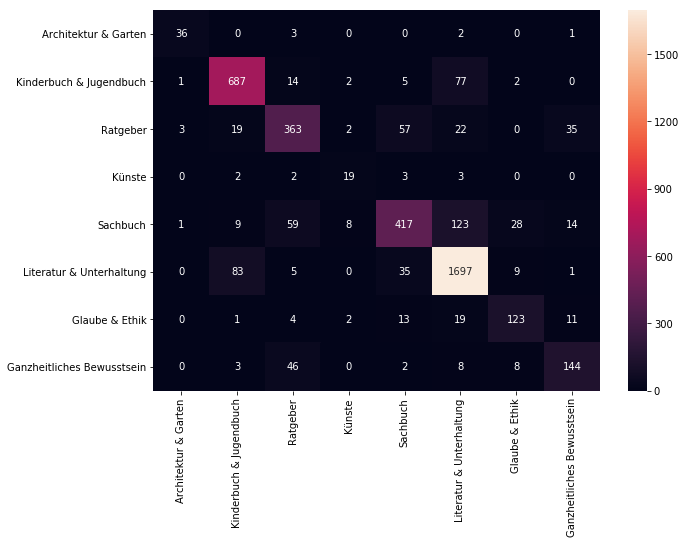

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf, annot=True,fmt="0.5g")

In [17]:
accuracy_score(y_pred_top,y_test_top)

0.8235294117647058

In [21]:
confusion_matrix(y_pred_top,y_test_top)

array([[  36,    0,    0,    1,    0,    0,    3,    1],
       [   1,  144,   11,    0,    0,    1,   35,   14],
       [   0,    8,  123,    2,    0,    9,    0,   28],
       [   0,    3,    1,  687,    2,   83,   19,    9],
       [   0,    0,    2,    2,   19,    0,    2,    8],
       [   2,    8,   19,   77,    3, 1697,   22,  123],
       [   3,   46,    4,   14,    2,    5,  363,   59],
       [   0,    2,   13,    5,    3,   35,   57,  417]])